# **Eksplorasi Data dan Rekomendasi Strategi Berdasarkan Dataset Pokémon**

---

[IND] Project ini dilakukan untuk **menganalisis dataset Pokémon** guna **mengidentifikasi tren** dan ***insight*** yang dapat membantu ***player*** dalam **membuat komposisi tim yang tepat**.

---

[ENG] This project was conducted **to analyze the Pokemon dataset** to **identify trends** and **insights** that can help players make the **good team composition**.



# **Import library and dataset**

In [39]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


[IND] Pertama, mengimpor pustaka yang diperlukan dan memuat dataset 'Pokemon.csv' yang akan dipakai.
Selanjutnya, tampilkan 5 baris pertama dari dataset tersebut untuk memberikan gambaran awal.

---

[ENG] First step, **import** the **necessary libraries** and load the 'Pokemon.csv' dataset to be used. Next, display the first 5 rows of the dataset to **give an initial overview**.

# **Summary Dataset**

In [40]:
# Summary Dataset to understand the dataset

# Display information about data types
print(df.info())

# Display the dimensions of the dataset (number of rows and columns)
print(df.shape)

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        8

[IND] Memberikan gambaran tentang struktur dataset, jumlah baris dan kolom, serta tipe data setiap kolom. Dari informasi tersebut, dataset pokemon memiliki 800 baris data dan 13 kolom.

---

[ENG] Provides an overview of dataset structure, the number of rows and columns, and the data type of each column. From the information, the **pokemon dataset** has **800 rows of data** and **13 columns**.

# **Data Cleaning**

In [41]:
# Check Missing Values and Duplicated Data
print('Check missing values: ')
print(df.isnull().sum())

print('\nDuplicated data:')
print(df.duplicated().sum())

# Drop column
df.drop(columns = ['#'], inplace = True)

# Handling Missing Values
#df['Type 2'].fillna('None', inplace = True) # replace missing values with 'None' (if u want)

#print('\nData after handling missing values: ')
#print(df.isnull().sum())
print(df.shape)
df.head(5)

Check missing values: 
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Duplicated data:
0
(800, 12)


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


[IND] Pada tahap ini, kita cek nilai yang hilang dan nilai yang duplikat. Kemudian, kita hapus juga kolom yang tidak terpakai ('#').

Dari hasil tersebut, terdapat 386 nilai yang hilang dalam kolom 'Type 2', akan tetapi itu tidak memengaruhi hasil analisis kita kedepannya. Oleh karena itu, nilai yang hilang pada kolom tersebut aku abaikan.

---

[ENG] At this step, we **check** for **missing values** and **duplicated** values. Then, we also **remove** the **unused column** ('#').

From the result, there are **386 missing values** in the '**Type 2**' column, but **it doesn't affect** our **future** analysis result. Therefore, I **ignore** the missing values in '**Type 2**' column.



# **Exploratory Data Analysis**

In [42]:
# Describe the dataset
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


[IND] Memberikan gambaran statistik dasar dari kolom numerik dalam dataset, seperti rata-rata, deviasi standar, dan kuartil. Terlihat dari data tersebut juga tidak ada nilai yang hilang dalam baris '**count**' nya.

---

[ENG] Provides an overview of the **basic statistics** of the **numeric columns** in the dataset, such as **mean**, **standard deviation** and **quartiles**. It can also be seen from the data that **there are no missing values in the count row**.


Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


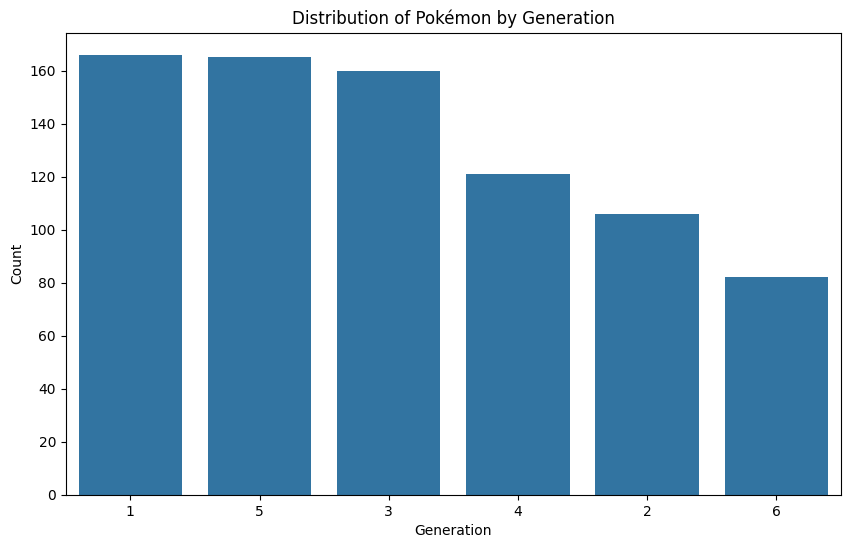

In [43]:
# Distribution of Pokemon by all Generation
print(df['Generation'].value_counts())

# Count each generation and sort
generation_counts = df['Generation'].value_counts().sort_values(ascending=False)

# Convert the sorted index to a categorical type with the same ordering
df['Generation'] = pd.Categorical(df['Generation'], categories=generation_counts.index, ordered=True)

# Plot the sorted countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Generation', order=generation_counts.index)
plt.title('Distribution of Pokémon by Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

[IND] Gambar ini menunjukkan distribusi jumlah Pokemon di setiap generasinya dan diurutkan dari yang terbanyak sampai terendah. Hal ini berfungsi untuk mengetahui banyaknya penyebaran pokemon di setiap generasinya.

Dalam hal ini, generasi 1 adalah generasi yang memiliki distribusi pokemon terbanyak, yaitu 166 pokemon.

---

[ENG] This figure shows the **distribution** of the number of Pokemon in **each generation** and is **sorted** from **highest to lowest**. This serves to **determine** the number of pokemon **distribution** in each generation.

In this case, **generation 1** has the **largest distribution** of pokemon, which is **166** pokemons.

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


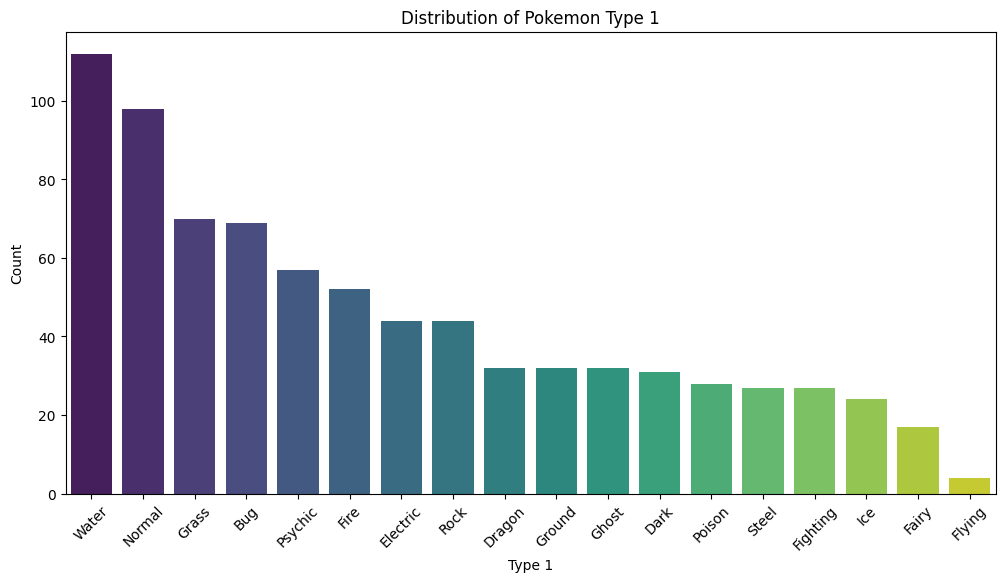

In [44]:
# Count the number of Pokemon for each Type 1
type1_distribution = df['Type 1'].value_counts()
print(type1_distribution)

# Plotting distribution type 1
plt.figure(figsize=(12, 6))
sns.barplot(x=type1_distribution.index, y=type1_distribution.values, palette='viridis', hue=type1_distribution.index)
plt.title('Distribution of Pokemon Type 1')
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

[IND] Gambar tersebut menunjukkan pendistribusian pokemon 'Type 1', yang dimana elemen tertinggi pada tipe 1 adalah water (112) dan disusul oleh elemen normal (98) serta grass(70).

---

[ENG] The figure shows the distribution of '**Type 1**' pokemon, where the **highest element** in type 1 is **water (112), followed by normal (98) and grass (70).**

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64


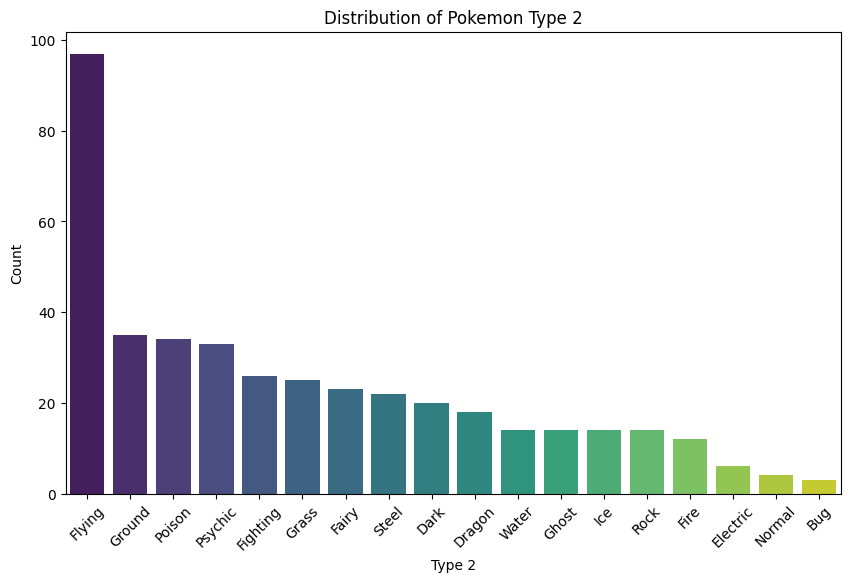

In [45]:
# Count the number of Pokemon for each Type 2
type2_distribution = df['Type 2'].value_counts()
print(type2_distribution)

# Visualization Pokemon Type 2
plt.figure(figsize=(10,6))
sns.barplot(x=type2_distribution.index, y=type2_distribution.values, palette='viridis', hue=type2_distribution.index)
plt.title('Distribution of Pokemon Type 2')
plt.xlabel('Type 2')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

[IND] Gambar tersebut menunjukkan pendistribusian pokemon pada 'Type 2', yang dimana pendistribusian tertinggi ada pada elemen Flying dengan 97 pokemon, disusul dengan Ground (35) dan Poison (34).

---

[ENG] The figure shows the distribution of pokemon in '**Type 2**', where the **highest distribution** is in the **Flying** element with **97** pokemon, followed by **Ground** (35) and **Poison** (34).

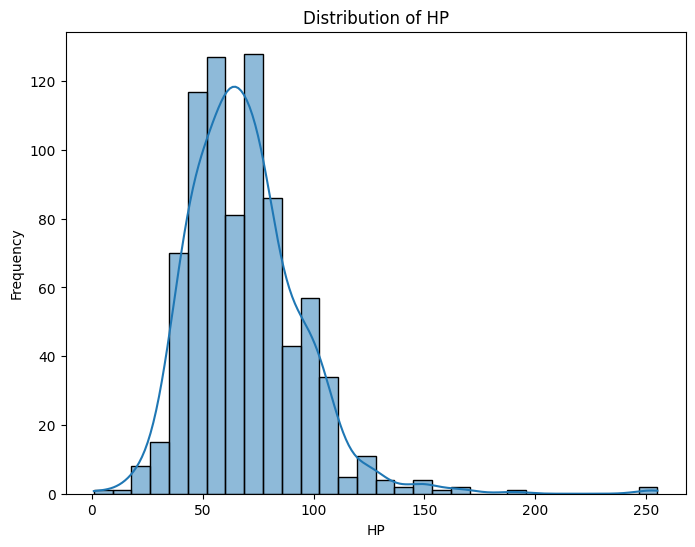

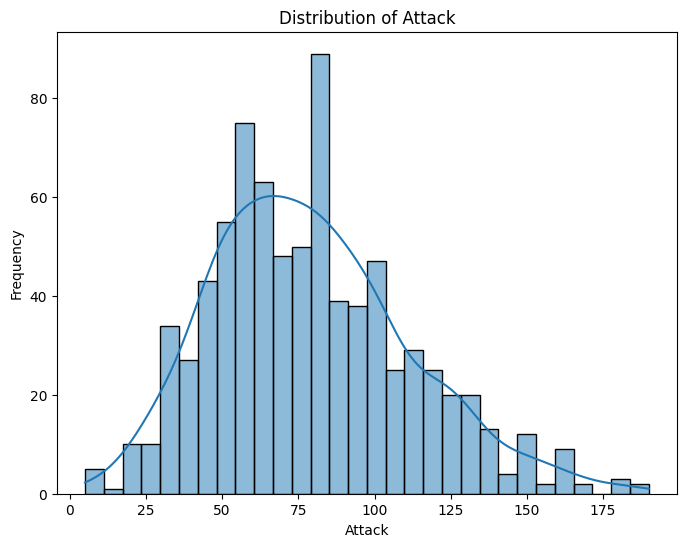

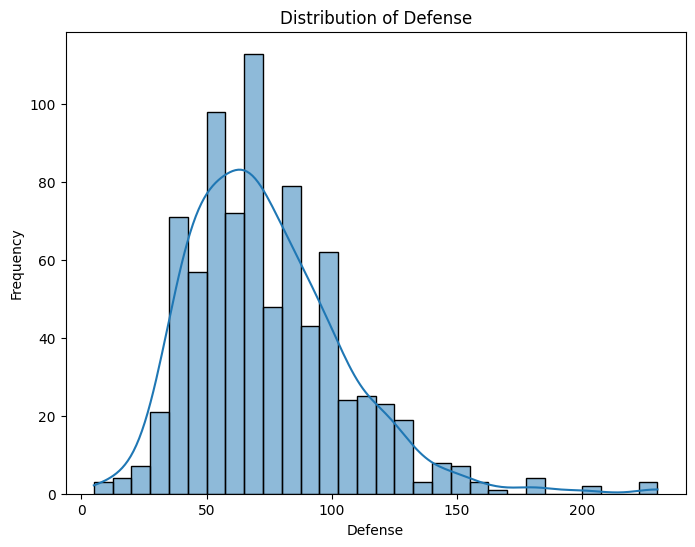

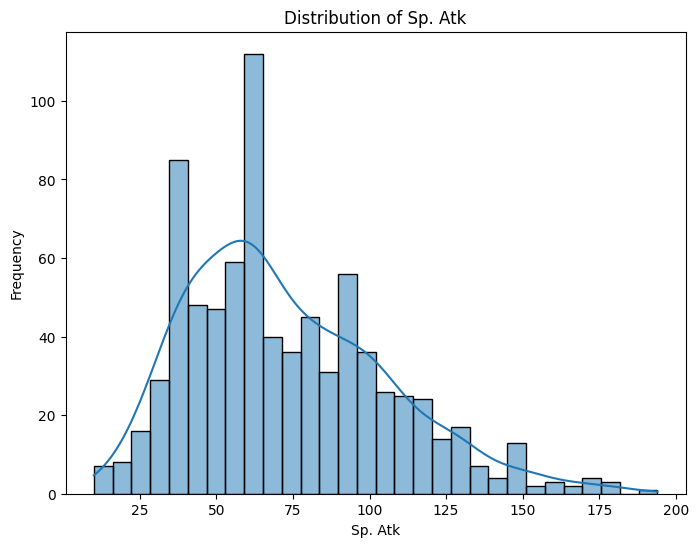

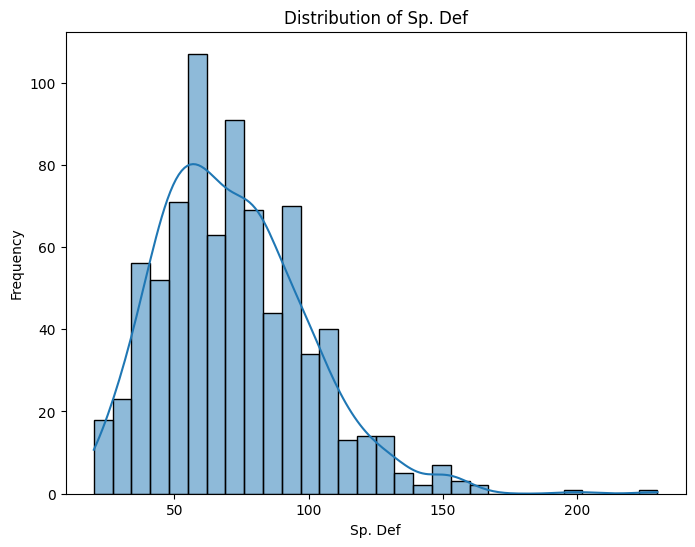

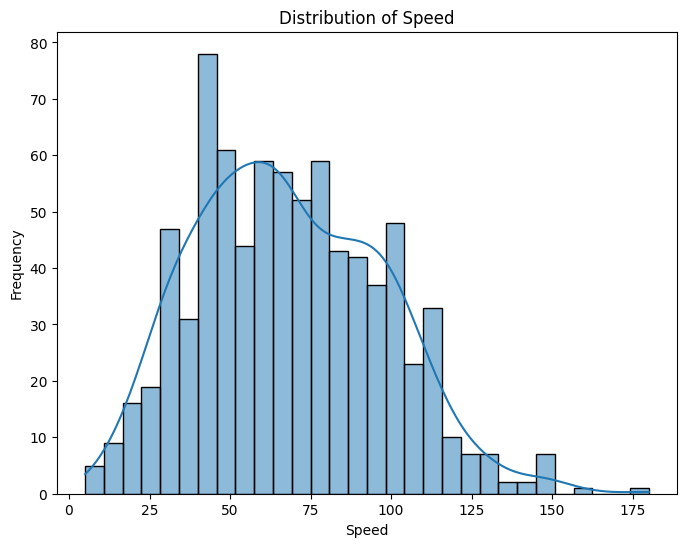

In [66]:
# List stats
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Loop to make  histogram plot for each stats
for stat in stats:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[stat], bins=30, kde=True)
    plt.title(f'Distribution of {stat}')
    plt.xlabel(stat)
    plt.ylabel('Frequency')
    plt.show()

[IND]
Tahap ini adalah membuat histogram untuk setiap statistik individu (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) untuk menunjukkan distribusi pokemon dan memberi gambaran tentang variasi statistik dalam dataset.

Dari semua gambar diatas, semua distribusinya condong ke arah kanan (skewness positif).

---

[ENG] At this step, is to **create histograms** for each individual statistic (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) to **show** the distribution of the pokemon and **give an idea** of the **statistical variation** in the dataset.

From all the figures above, **all the distributions** are **skewed** towards the right (it called **positive skewness**).

Top 5 Pokemon with Highest Attack: 
                        Name  Attack Generation  Legendary
163      MewtwoMega Mewtwo X     190          1       True
232  HeracrossMega Heracross     185          2      False
424    GroudonPrimal Groudon     180          3       True
426    RayquazaMega Rayquaza     180          3       True
429       DeoxysAttack Forme     180          3       True


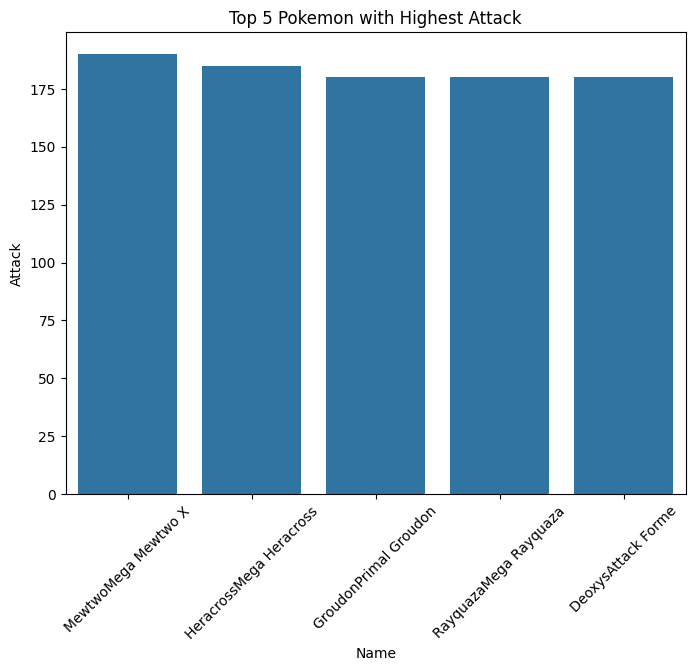

In [67]:
# Top 5 Pokemon by Stats Attack
top_atk = df[['Name', 'Attack', 'Generation', 'Legendary']].sort_values(by = 'Attack', ascending=False).head(5)
print('Top 5 Pokemon with Highest Attack: ')
print(top_atk)

# Visualization of the pokemon that has the highest attack
plt.figure(figsize=(8,6))
sns.barplot(data=top_atk, x='Name', y='Attack')
plt.title('Top 5 Pokemon with Highest Attack')
plt.xticks(rotation=45)
plt.show()

[IND] Gambar ini menampilkan dan memplot 5 Pokémon teratas dengan Attack terbesar dari seluruh generasi, baik yang legendary maupun non-legendary. Analisis ini berguna untuk membantu dalam memahami kekuatan dan kelemahan Pokémon.

Dari gambar tersebut, didapatkan 5 Pokémon teratas dengan Attack terbesar. Salah satunya adalah Mewtwo (Mega Mewtwo X) dari generasi 1 dengan Attack sebesar 190. Selain itu, terdapat Heracross (Mega Heracross) dari generasi 2 yang bukan merupakan Pokémon legendaris dengan Attack sebesar 185.


---

[ENG] This figure displays and plots the **top 5 Pokemon** with the **largest Attack** from all generations, both legendary and non - legendary. This analysis is **useful to help in understanding** the **strengths** and **weaknesses** of Pokemon.

From the figure, the top 5 Pokémon with the largest Attack are obtained. One of them is **Mewtwo (Mega Mewtwo X)** from **generation 1** with an Attack of **190**. In addition, there is **Heracross (Mega Heracross)** from **generation 2** which is **not a legendary Pokémon** with an Attack of **185**.

Top 5 Pokemon with Lowest Attack: 
         Name  Attack Generation  Legendary
488   Happiny       5          4      False
121   Chansey       5          1      False
230   Shuckle      10          2      False
261   Blissey      10          2      False
139  Magikarp      10          1      False


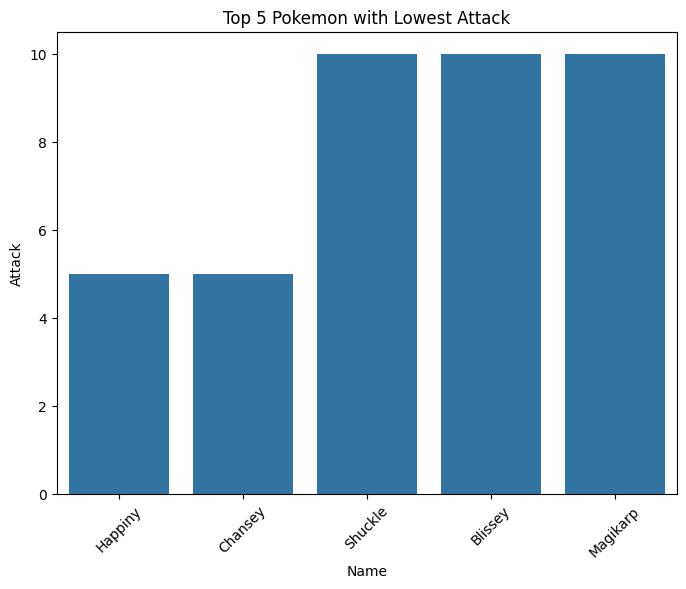

In [68]:
# Top 5 Pokemon with Lowest Attack
low_atk = df[['Name', 'Attack', 'Generation', 'Legendary']].sort_values(by = 'Attack', ascending=True).head(5)
print('Top 5 Pokemon with Lowest Attack: ')
print(low_atk)

# Visualization of the pokemon that has the lowest attack
plt.figure(figsize=(8,6))
sns.barplot(data=low_atk, x='Name', y='Attack')
plt.title('Top 5 Pokemon with Lowest Attack')
plt.xticks(rotation=45)
plt.show()

[IND] Gambar tersebut menunjukkan top 5 Pokemon dengan serangan terendah. Didapat 5 pokemon dengan salah satunya, yaitu Happiny dan Chansey dari generasi 4 dan 1 dengan serangan hanya sebesar 5.

---

[ENG] The image shows the top 5 Pokemon with the **lowest attack**. There are 5 pokemon with one of them, **Happiny and Chansey** from **generation 4** and **1** with an **attack** of **only 5**.

Top 5 Pokemon with Highest Defense: 
                    Name  Defense Generation  Legendary
230              Shuckle      230          2      False
224  SteelixMega Steelix      230          2      False
333    AggronMega Aggron      230          3      False
223              Steelix      200          2      False
414             Regirock      200          3       True


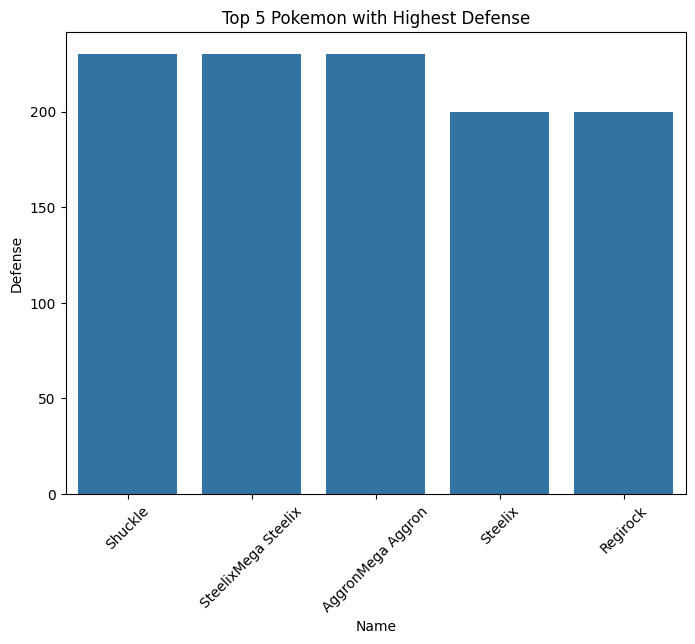

In [69]:
# Top 5 Pokemon with the highest defense
top_def = df[['Name', 'Defense','Generation','Legendary']].sort_values(by='Defense', ascending = False).head(5)
print('Top 5 Pokemon with Highest Defense: ')
print(top_def)

# Visualization of The Pokemon that has the highest defense
plt.figure(figsize=(8,6))
sns.barplot(data=top_def, x='Name', y='Defense')
plt.title('Top 5 Pokemon with Highest Defense')
plt.xticks(rotation=45)
plt.show()

[IND]
Dari hasil analisis dan visualisasi, terlihat bahwa Shuckle, Steelix (Mega Steelix), dan Aggron (Mega Aggron) memiliki Defense tertinggi di antara semua Pokémon, dengan nilai yang sama yaitu 230. Keberadaan Pokémon legendaris dalam daftar ini hanya diwakili oleh Regirock. Mayoritas Pokémon dengan Defense tertinggi berasal dari Generasi 2 dan Generasi 3.

---

[ENG] From the analysis and visualization results, it can be seen that **Shuckle**, **Steelix (Mega Steelix)**, and **Aggron (Mega Aggron)** have the **highest Defense** among all Pokémon, with the same **value of 230**. The presence of legendary Pokémon in this list is **only represented** by **Regirock**. The **majority** of Pokémon with the **highest Defense** are from **Generation 2** and **Generation 3**.

Top 5 Pokemon with Lowest Defense: 
          Name  Defense Generation  Legendary
121    Chansey        5          1      False
488    Happiny        5          4      False
261    Blissey       10          2      False
186      Pichu       15          2      False
188  Igglybuff       15          2      False


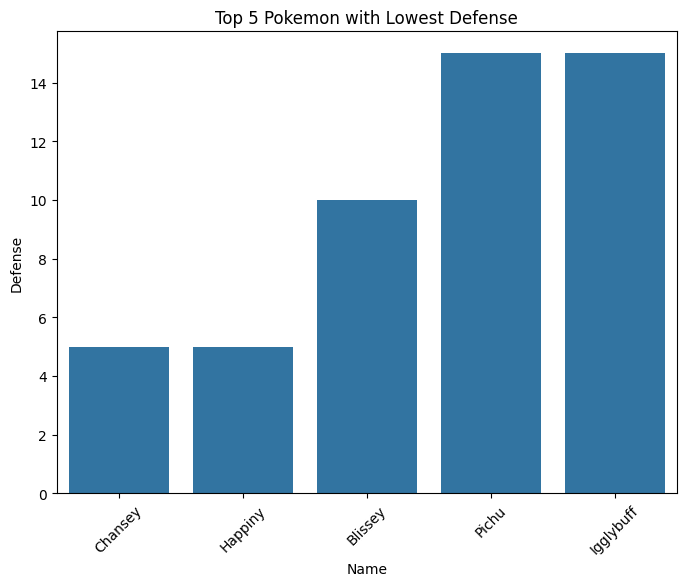

In [70]:
# Top 5 Pokemon with Lowest Defense
low_def = df[['Name', 'Defense', 'Generation', 'Legendary']].sort_values(by='Defense', ascending = True).head(5)
print('Top 5 Pokemon with Lowest Defense: ')
print(low_def)

# Visualization of the Pokemon that has the lowest defense
plt.figure(figsize=(8,6))
sns.barplot(data=low_def, x='Name', y='Defense')
plt.title('Top 5 Pokemon with Lowest Defense')
plt.xticks(rotation=45)
plt.show()

[IND]
Grafik batang yang dibuat menunjukkan bahwa Pokémon dengan Defense terendah adalah Chansey, diikuti oleh Happiny, Blissey, Caterpie, dan Azurill. Chansey memiliki nilai Defense paling rendah, yaitu 5. Blissey, yang berevolusi dari Chansey, juga memiliki nilai Defense yang sangat rendah, yaitu 10. Caterpie, Happiny, dan Azurill melengkapi daftar ini dengan nilai Defense masing-masing 20.

Semua Pokémon dalam daftar ini bukan merupakan Pokémon legendaris, hal ini menunjukkan bahwa Pokémon dengan Defense terendah biasanya adalah Pokémon non-legendaris.

---

[ENG] The bar graph created shows that the Pokémon with the **lowest Defense** is **Chansey**, followed by **Happiny**, **Blissey**, **Caterpie**, and **Azurill**. Chansey has the lowest **Defense value, at 5**. Blissey, which evolved from Chansey, also has a **very low Defense** value of 10. Caterpie, Happiny, and Azurill round out this list with Defense values of 20 each.

All of the Pokémon on this list are **not legendary Pokémon**, showing that the Pokémon with the **lowest Defense are usually non-legendary Pokémon**.

Top 5 Pokemon with Highest HP: 
          Name   HP Generation  Legendary
261    Blissey  255          2      False
121    Chansey  250          1      False
217  Wobbuffet  190          2      False
351    Wailord  170          3      False
655  Alomomola  165          5      False


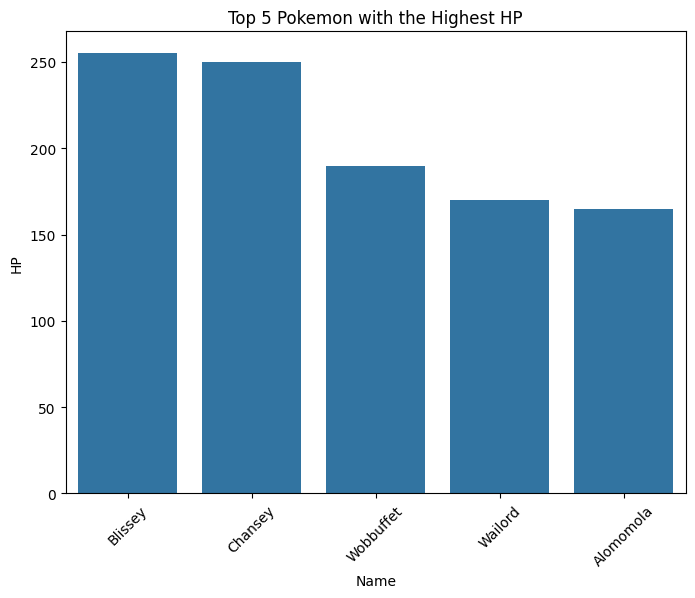

In [74]:
# Top 5 of Pokemon with the highest HP
top_hp =df[['Name', 'HP', 'Generation', 'Legendary']].sort_values(by='HP', ascending=False).head(5)
print('Top 5 Pokemon with Highest HP: ')
print(top_hp)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=top_hp, x='Name', y='HP')
plt.title('Top 5 Pokemon with the Highest HP')
plt.xticks(rotation=45)
plt.show()

[IND] Grafik batang yang dibuat menunjukkan bahwa Pokémon dengan HP tertinggi adalah Blissey, diikuti oleh Chansey, Wobbuffet, Wailord, dan Alomomola. Blissey memiliki nilai HP paling tinggi, yaitu 255, diikuti oleh Chansey dengan HP 250. Wobbuffet, Wailord, dan Alomomola melengkapi daftar ini dengan nilai HP masing-masing 190, 170, dan 165.

Semua Pokémon dalam daftar ini juga bukan Pokémon legendaris, hal ini menunjukkan bahwa beberapa Pokémon non-legendaris memiliki HP yang sangat tinggi.


---


[ENG] The bar graph created shows that the Pokémon with the highest HP is Blissey, followed by Chansey, Wobbuffet, Wailord, and Alomomola. Blissey has the highest HP value of 255, followed by Chansey with 250 HP. Wobbuffet, Wailord, and Alomomola round out this list with HP values of 190, 170, and 165, respectively.

All Pokémon on this list are also not legendary Pokémon, showing that some non-legendary Pokémon have very high HP.


Top 5 Pokemon with Lowest HP: 
         Name  HP Generation  Legendary
316  Shedinja   1          3      False
55    Diglett  10          1      False
139  Magikarp  20          1      False
388   Duskull  20          3      False
487  Mime Jr.  20          4      False


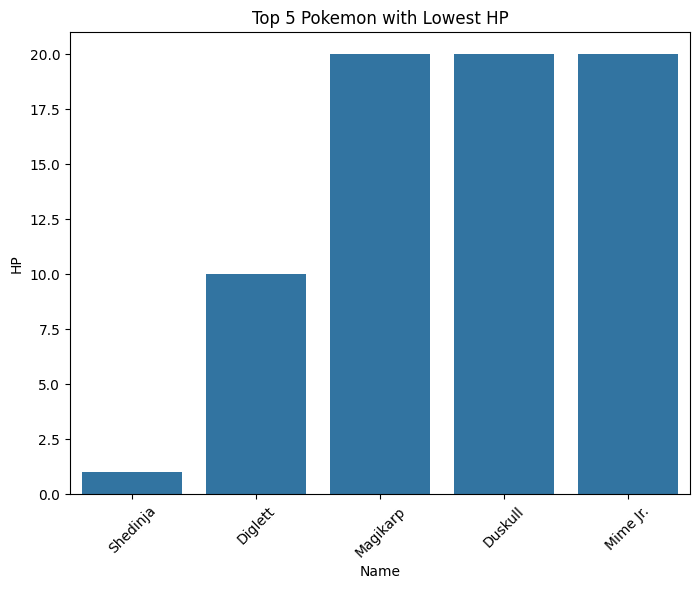

In [75]:
# Top 5 Pokemon with the lowest HP
low_HP = df[['Name', 'HP', 'Generation', 'Legendary']].sort_values(by='HP', ascending=True).head(5)
print('Top 5 Pokemon with Lowest HP: ')
print(low_HP)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=low_HP, x='Name', y='HP')
plt.title('Top 5 Pokemon with Lowest HP')
plt.xticks(rotation=45)
plt.show()

[IND] Shedinja memiliki nilai HP paling rendah, yaitu 1, yang sangat unik dan jauh di bawah Pokémon lainnya. Diglett, dengan HP 10, juga memiliki nilai HP yang sangat rendah. Magikarp, Duskull, dan Mime Jr. masing-masing memiliki HP 20. Semua Pokémon dalam daftar ini berasal dari berbagai generasi dan semuanya non-legendaris, menunjukkan bahwa Pokémon dengan HP terendah cenderung berasal dari beberapa generasi berbeda dan biasanya bukan Pokémon legendaris.

---

[ENG] Shedinja has the lowest HP value of 1, which is very unique and far below other Pokémon. Diglett, with an HP of 10, also has a very low HP value. Magikarp, Duskull, and Mime Jr. each have an HP of 20. All the Pokémon on this list come from multiple generations and are all non-legendary, indicating that the Pokémon with the lowest HP tend to come from several different generations and are usually not legendary Pokémon.

Top 5 Pokemon with Highest Speed:
                          Name  Speed Generation  Legendary
431          DeoxysSpeed Forme    180          3       True
315                    Ninjask    160          3      False
428         DeoxysNormal Forme    150          3       True
154  AerodactylMega Aerodactyl    150          1      False
71       AlakazamMega Alakazam    150          1      False


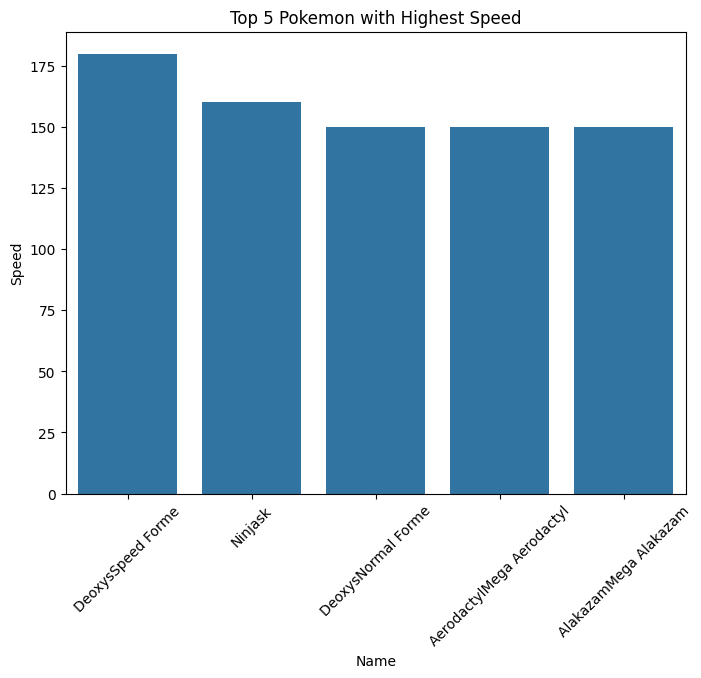

In [76]:
# Top 5 Pokemon with Highest Speed
top_spd = df[['Name', 'Speed', 'Generation', 'Legendary']].sort_values(by='Speed', ascending=False).head(5)
print('Top 5 Pokemon with Highest Speed:')
print(top_spd)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=top_spd, x='Name', y='Speed')
plt.title('Top 5 Pokemon with Highest Speed')
plt.xticks(rotation=45)
plt.show()

[IND] Grafik batang yang dibuat menunjukkan Deoxys (Speed Forme) memiliki nilai Speed paling tinggi, yaitu 180, jauh di atas Pokémon lainnya. Daftar ini didominasi oleh Pokémon dari Generasi 3 dan Generasi 1. Terdapat dua bentuk Deoxys dalam daftar, yaitu Speed Forme dan Normal Forme, menunjukkan variasi kemampuan dari Pokémon legendaris tersebut. Selain itu, Pokémon non-legendaris seperti Ninjask, Aerodactyl (Mega Aerodactyl), dan Alakazam (Mega Alakazam) juga memiliki Speed yang sangat tinggi.


---

[ENG] The bar graph created shows Deoxys (Speed Forme) has the **highest Speed** value of **180**, far above other Pokémon. This list is **dominated** by Pokémon from **Generation 3** and **Generation 1**. There are two forms of Deoxys in the list, namely **Speed Forme** and **Normal Forme**, showing the variety of abilities of these **legendary Pokémon**. In addition, **non-legendary** Pokémon such as Ninjask, Aerodactyl (Mega Aerodactyl), and Alakazam (Mega Alakazam) also have **very high Speed**.

Top 5 Pokemon with Lowest Speed:
          Name  Speed Generation  Legendary
495   Munchlax      5          4      False
230    Shuckle      5          2      False
658  Ferroseed     10          5      False
486     Bonsly     10          4      False
359   Trapinch     10          3      False


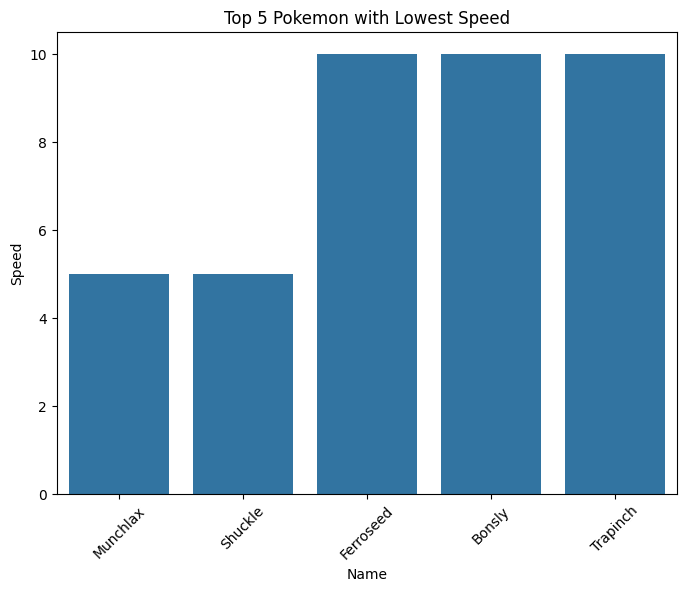

In [77]:
# Top 5 Pokemon with Lowest Speed
low_spd = df[['Name', 'Speed', 'Generation', 'Legendary']].sort_values(by='Speed', ascending=True).head(5)
print('Top 5 Pokemon with Lowest Speed:')
print(low_spd)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=low_spd, x='Name', y='Speed')
plt.title('Top 5 Pokemon with Lowest Speed')
plt.xticks(rotation=45)
plt.show()

[IND] Munchlax dan Shuckle memiliki nilai Speed paling rendah, yaitu 5. Pokémon lainnya dalam daftar, Ferroseed, Bonsly, dan Trapinch, memiliki Speed yang sedikit lebih tinggi yaitu 10. Semua Pokémon dalam daftar ini adalah non-legendaris, menunjukkan bahwa Pokémon dengan Speed terendah umumnya tidak termasuk dalam kategori legendaris.

---

[ENG] **Munchlax** and **Shuckle** have the **lowest Speed** value, **which is 5**. The other Pokémon on the list, Ferroseed, Bonsly, and Trapinch, have a **slightly higher Speed** of 10. All Pokémon on this list are **non-legendary**, indicating that the Pokémon with the **lowest Speed generally** don't fall into the **legendary category**.

Top 5 Pokemon with Highest Sp. Atk:
                      Name  Sp. Atk Generation  Legendary
164    MewtwoMega Mewtwo Y      194          1       True
422    KyogrePrimal Kyogre      180          3       True
429     DeoxysAttack Forme      180          3       True
426  RayquazaMega Rayquaza      180          3       True
71   AlakazamMega Alakazam      175          1      False


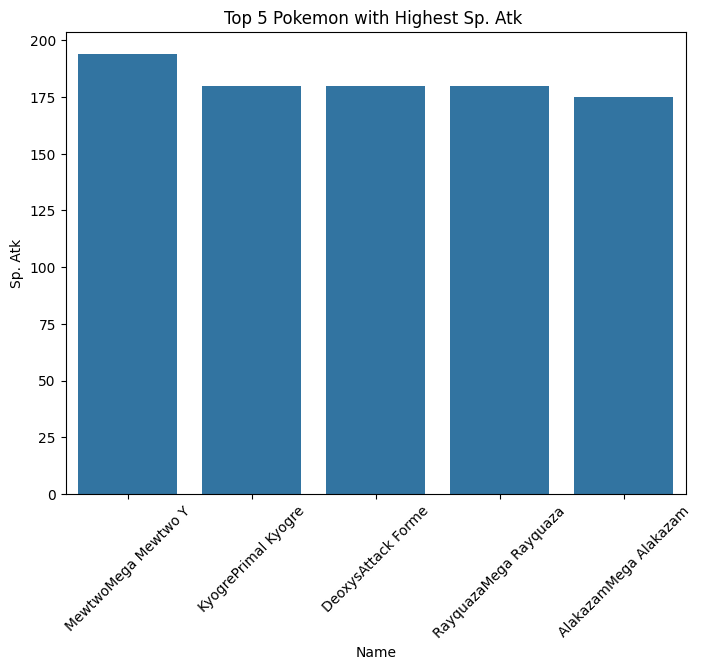

In [78]:
# Top 5 Pokemon with Highest Sp. Attack
top_spatk = df[['Name', 'Sp. Atk', 'Generation', 'Legendary']].sort_values(by='Sp. Atk', ascending=False).head(5)
print('Top 5 Pokemon with Highest Sp. Atk:')
print(top_spatk)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=top_spatk, x='Name', y='Sp. Atk')
plt.title('Top 5 Pokemon with Highest Sp. Atk ')
plt.xticks(rotation=45)
plt.show()

[IND] Mewtwo (Mega Mewtwo Y) memiliki Sp. Atk tertinggi, yaitu 194, yang jauh lebih tinggi dibandingkan dengan Pokémon lainnya. Daftar ini didominasi oleh Pokémon legendaris dari Generasi 3, dengan Kyogre, Deoxys, dan Rayquaza memiliki Sp. Atk yang sama, yaitu 180. Alakazam (Mega Alakazam), meskipun non-legendaris, memiliki Sp. Atk yang sangat tinggi, yaitu 175. Ini menunjukkan bahwa banyak Pokémon legendaris memiliki kemampuan serangan spesial yang sangat kuat.

---

[ENG] Mewtwo (Mega Mewtwo Y) has the highest **Sp. Atk**, at **194**, which is much **higher compared** to other Pokémon. This list is **dominated by legendary Pokémon** from **Generation 3**, with Kyogre, Deoxys, and Rayquaza having the same Sp. Atk of 180. Alakazam (Mega Alakazam), although **non-legendary**, has a very high Sp. Atk of 175. This shows that many legendary Pokémon have **very powerful** special attack abilities.

Top 5 Pokemon with Lowest Sp. Atk:
                      Name  Sp. Atk Generation  Legendary
230                Shuckle       10          2      False
486                 Bonsly       10          4      False
381                 Feebas       10          3      False
19   BeedrillMega Beedrill       15          1      False
614               Darumaka       15          5      False


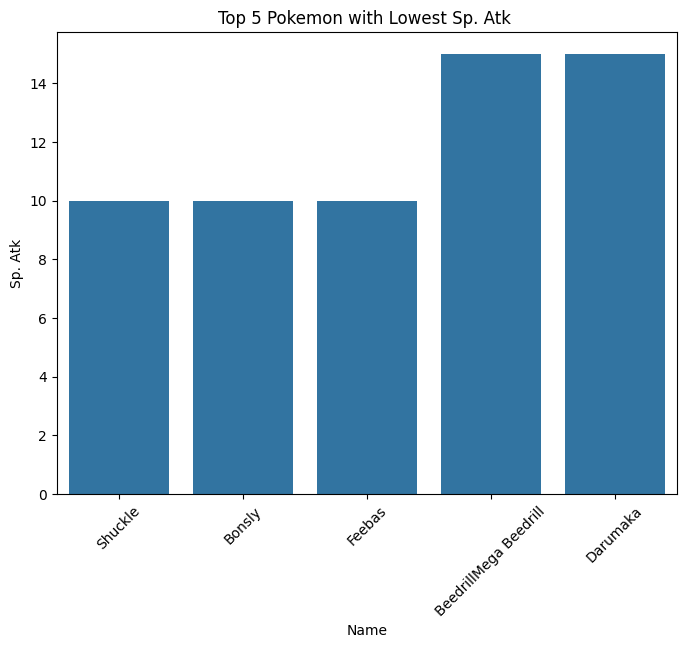

In [79]:
# Top 5 Pokemon with Lowest Sp. Attack
low_spatk = df[['Name', 'Sp. Atk', 'Generation', 'Legendary']].sort_values(by='Sp. Atk', ascending=True).head(5)
print('Top 5 Pokemon with Lowest Sp. Atk:')
print(low_spatk)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=low_spatk, x='Name', y='Sp. Atk')
plt.title('Top 5 Pokemon with Lowest Sp. Atk ')
plt.xticks(rotation=45)
plt.show()

[IND] Shuckle, Bonsly, dan Feebas memiliki nilai Sp. Atk paling rendah, yaitu 10, yang menunjukkan kemampuan serangan spesial yang sangat terbatas. Beedrill (Mega Beedrill) dan Darumaka memiliki Sp. Atk yang sedikit lebih tinggi namun tetap termasuk dalam daftar Pokémon dengan Sp. Atk terendah, yaitu 15. Semua Pokémon dalam daftar ini adalah non-legendaris, menunjukkan bahwa Pokémon dengan Sp. Atk terendah umumnya bukan Pokémon legendaris.

---

[ENG] Shuckle, Bonsly, and Feebas have the lowest Sp. Atk value of 10, indicating very limited special attack abilities. Beedrill (Mega Beedrill) and Darumaka have a slightly higher Sp. Atk but are still included in the list of Pokémon with the lowest Sp. Atk, which is 15. All Pokémon on this list are non-legendary, indicating that Pokémon with the lowest Sp. Atk are generally not legendary Pokémon.

Top 5 Pokemon with Highest Sp. Def:
                    Name  Sp. Def Generation  Legendary
230              Shuckle      230          2      False
415               Regice      200          3       True
430  DeoxysDefense Forme      160          3       True
422  KyogrePrimal Kyogre      160          3       True
270                Ho-oh      154          2       True


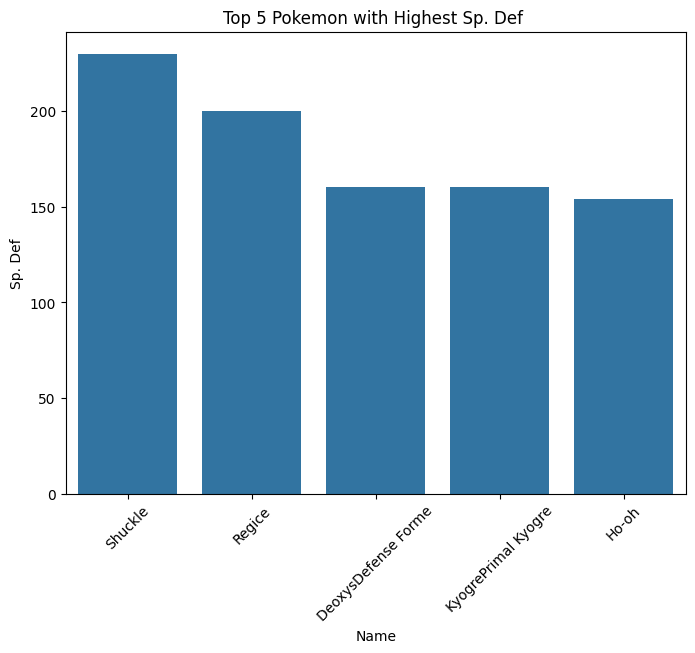

In [80]:
# Top 5 Pokemon with Highest Sp. Def
top_spdef = df[['Name', 'Sp. Def', 'Generation', 'Legendary']].sort_values(by='Sp. Def', ascending=False).head(5)
print('Top 5 Pokemon with Highest Sp. Def:')
print(top_spdef)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=top_spdef, x='Name', y='Sp. Def')
plt.title('Top 5 Pokemon with Highest Sp. Def ')
plt.xticks(rotation=45)
plt.show()

[IND] Grafik batang menunjukkan bahwa Shuckle memiliki Sp. Def tertinggi, yaitu 230, diikuti oleh Regice dengan Sp. Def 200. Deoxys (Defense Forme) dan Kyogre (Primal Kyogre) memiliki nilai Sp. Def yang sama, yaitu 160. Kemudian, Ho-oh dengan Sp. Def 154.


---

[ENG] The bar graph shows that Shuckle has the highest Sp. Def, which is 230, followed by Regice with Sp. Def 200. Deoxys (Defense Forme) and Kyogre (Primal Kyogre) have the same Sp. Def value, which is 160. Then, Ho-oh with Sp. Def 154.

Top 5 Pokemon with Lowest Sp. Def:
          Name  Sp. Def Generation  Legendary
188  Igglybuff       20          2      False
347   Carvanha       20          3      False
16      Weedle       20          1      False
13    Caterpie       20          1      False
139   Magikarp       20          1      False


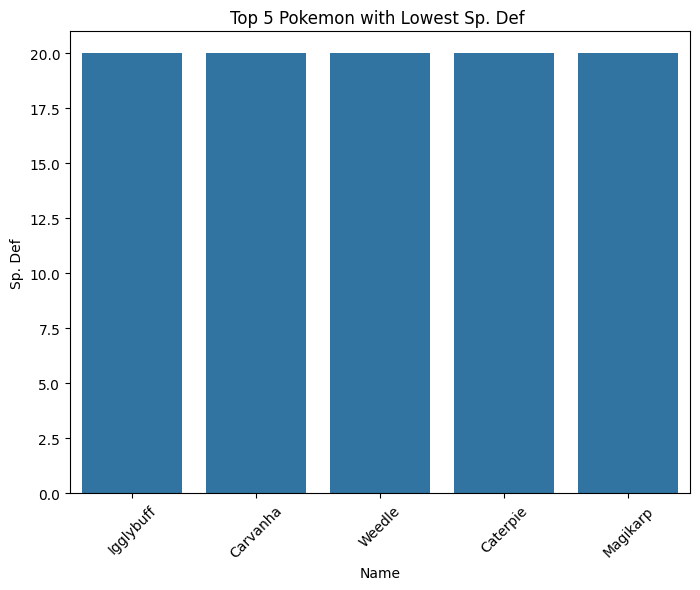

In [82]:
# Top 5 Pokemon with Lowest Sp. Def
low_spdef = df[['Name', 'Sp. Def', 'Generation', 'Legendary']].sort_values(by='Sp. Def', ascending=True).head(5)
print('Top 5 Pokemon with Lowest Sp. Def:')
print(low_spdef)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=low_spdef, x='Name', y='Sp. Def')
plt.title('Top 5 Pokemon with Lowest Sp. Def ')
plt.xticks(rotation=45)
plt.show()

[IND] Grafik batang menunjukkan bahwa Igglybuff, Carvanha, Weedle, Caterpie, dan Magikarp semuanya memiliki Sp. Def terendah, yaitu 20. Daftar ini didominasi oleh Pokémon non-legendaris dari berbagai generasi, khususnya Generasi 1 dan 3. IHal ini menunjukkan bahwa Pokémon dengan Sp. Def terendah umumnya adalah Pokémon non-legendaris dengan pertahanan spesial yang sangat rendah.


---

[ENG] The bar graph shows that Igglybuff, Carvanha, Weedle, Caterpie, and Magikarp all have the lowest Sp. Def, which is 20. This list is dominated by non-legendary Pokémon from various generations, particularly Generation 1 and 3. This shows that Pokémon with the lowest Sp. Def are generally non-legendary Pokémon with very low special defense.

Top 5 Pokemon with Highest Total:
                      Name  Total Generation  Legendary
426  RayquazaMega Rayquaza    780          3       True
164    MewtwoMega Mewtwo Y    780          1       True
163    MewtwoMega Mewtwo X    780          1       True
422    KyogrePrimal Kyogre    770          3       True
424  GroudonPrimal Groudon    770          3       True


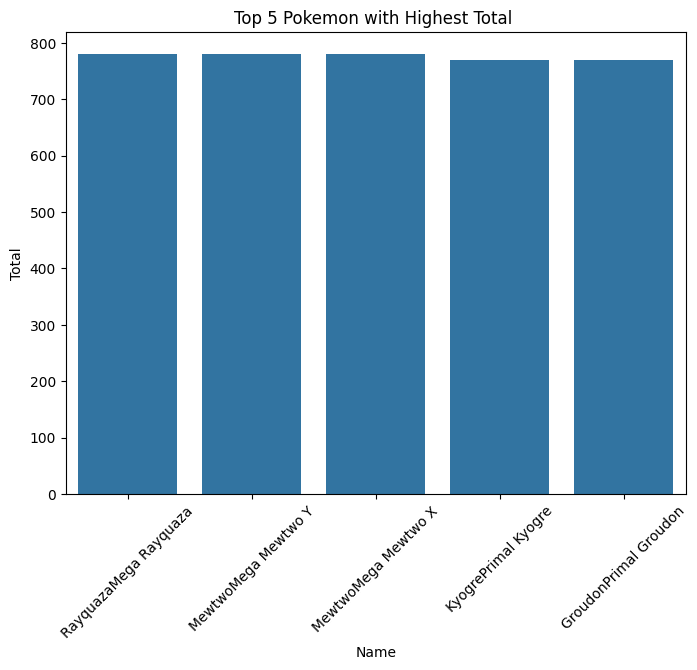

In [81]:
# Top 5 Pokemon with Highest Total
top_total = df[['Name', 'Total', 'Generation', 'Legendary']].sort_values(by='Total', ascending=False).head(5)
print('Top 5 Pokemon with Highest Total:')
print(top_total)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=top_total, x='Name', y='Total')
plt.title('Top 5 Pokemon with Highest Total ')
plt.xticks(rotation=45)
plt.show()

[IND] Rayquaza (Mega Rayquaza), Mewtwo (Mega Mewtwo Y), dan Mewtwo (Mega Mewtwo X) memiliki nilai Total tertinggi, yaitu 780, menunjukkan bahwa Pokémon Mega dengan bentuk ini sangat kuat secara keseluruhan. Kyogre (Primal Kyogre) dan Groudon (Primal Groudon) juga memiliki Total yang sangat tinggi, yaitu 770. Semua Pokémon dalam daftar ini adalah legendaris, menunjukkan bahwa Pokémon legendaris sering kali memiliki Total yang sangat tinggi dibandingkan dengan Pokémon non-legendaris.

---

[ENG] Rayquaza (Mega Rayquaza), Mewtwo (Mega Mewtwo Y), and Mewtwo (Mega Mewtwo X) have the highest Total values of 780, indicating that Mega Pokémon with this form are very strong overall. Kyogre (Primal Kyogre) and Groudon (Primal Groudon) also have very high Totals of 770. All of the Pokémon on this list are legendary, showing that legendary Pokémon often have very high Totals compared to non-legendary Pokémon.

Comparison of Legendary vs Non-Legendary:
Legendary
False    735
True      65
Name: count, dtype: int64


Text(0, 0.5, 'Count')

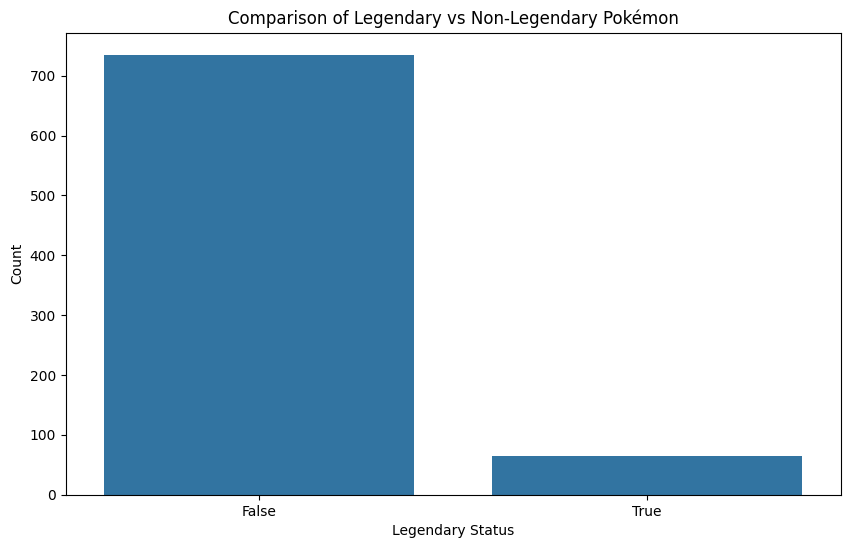

In [60]:
# Compare Legendary vs Non-Legendary
legendary_counts = df['Legendary'].value_counts()
print('Comparison of Legendary vs Non-Legendary:')
print(legendary_counts)

# Plot the comparison
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Legendary')
plt.title('Comparison of Legendary vs Non-Legendary Pokémon')
plt.xlabel('Legendary Status')
plt.ylabel('Count')

[IND] Pokémon non-legendaris jauh lebih banyak, dengan total 735 Pokémon dibandingkan dengan 65 Pokémon legendaris.

---

[ENG] Non-legendary Pokémon are much more numerous, with a total of 735 Pokémon compared to 65 legendary Pokémon.

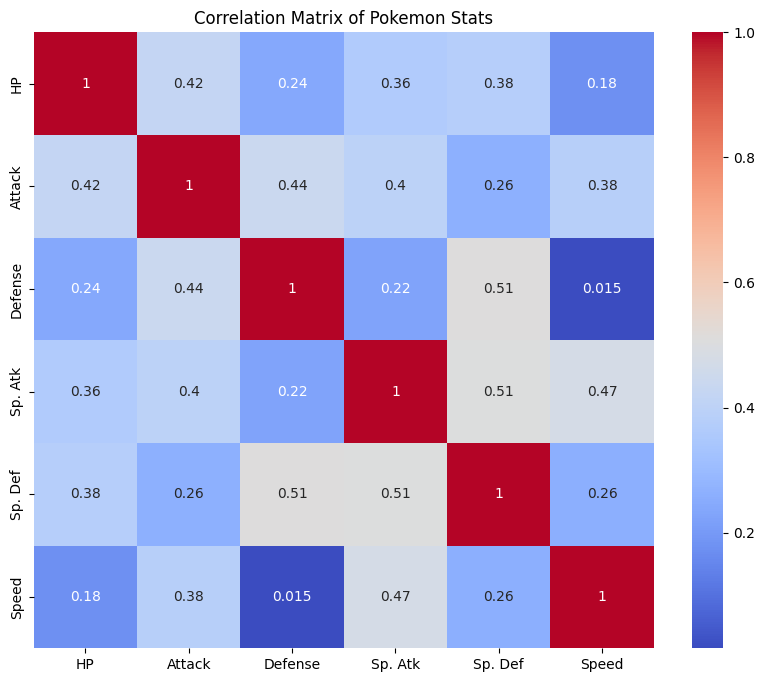

In [61]:
# Correlation Matrix between Stats
cor_matrix = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokemon Stats')
plt.show()

[IND] Secara umum, hubungan antara statistik utama Pokémon menunjukkan variasi dalam kekuatan dan kelemahan mereka. Korelasi yang lebih sedang ditemukan antara atribut pertahanan (Sp.def & Sp. Atk), sementara atribut serangan dan kecepatan memiliki korelasi yang lebih rendah dengan atribut lainnya.

---

[ENG] In general, the relationships between Pokémon's main statistics show variations in their strengths and weaknesses. More moderate correlations are found between defense attributes (Sp.def & Sp. Atk), while attack and speed attributes have lower correlations with other attributes.

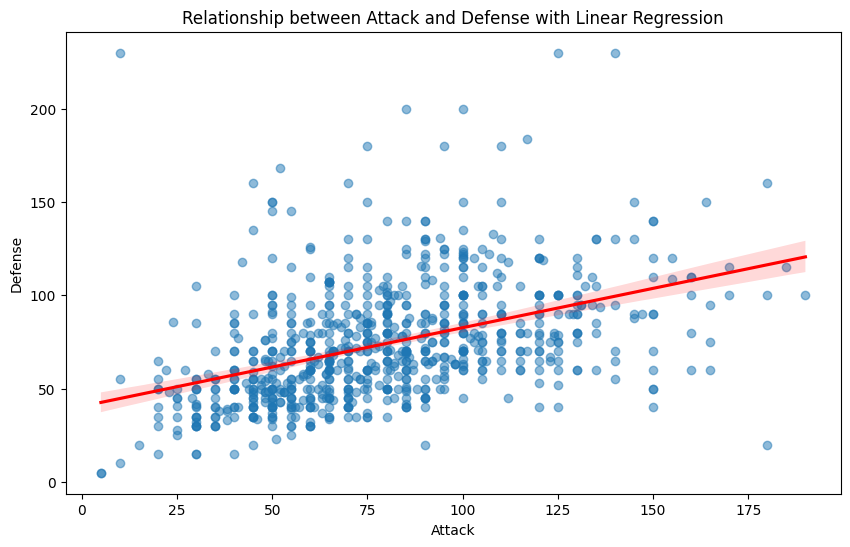

In [83]:
# Scatter plot with linier regression
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Attack', y='Defense', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Attack and Defense with Linear Regression')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

[IND] Garis regresi memberikan gambaran umum bahwa ketika 'Attack' meningkat, 'Defense' cenderung meningkat juga, namun prediksinya mungkin kurang akurat karena sebaran datanya yang cukup luas.


---

[ENG] The regression line gives a general idea that as 'Attack' increases, 'Defense' tends to increase as well, but the prediction may be less accurate due to the wide spread of the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


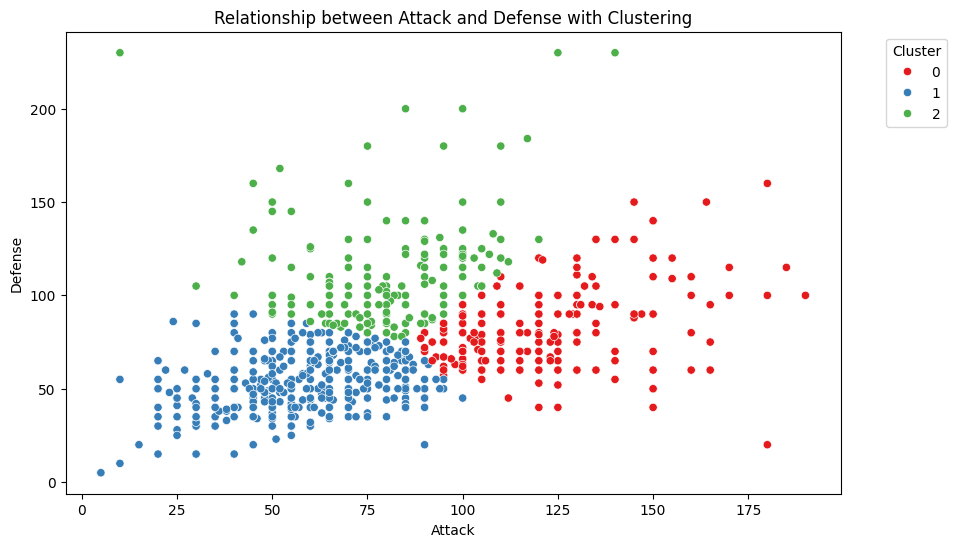

In [63]:
# K-Means
# Clustering with best k (e.g. k=3)
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

# Scatter plot with clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Cluster', palette='Set1')
plt.title('Relationship between Attack and Defense with Clustering')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [65]:
#Show Pokemon in Each Cluster:
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

print("Pokémon in Cluster 0:")
print(cluster_0)

print("\nPokémon in Cluster 1:")
print(cluster_1)

print("\nPokémon in Cluster 2:")
print(cluster_2)

Pokémon di Cluster 0:
                          Name   Type 1  Type 2  Total   HP  Attack  Defense  \
7    CharizardMega Charizard X     Fire  Dragon    634   78     130      111   
8    CharizardMega Charizard Y     Fire  Flying    634   78     104       78   
19       BeedrillMega Beedrill      Bug  Poison    495   65     150       40   
39                    Nidoking   Poison  Ground    505   81     102       77   
52                    Parasect      Bug   Grass    405   60      95       80   
..                         ...      ...     ...    ...  ...     ...      ...   
792                    Xerneas    Fairy     NaN    680  126     131       95   
793                    Yveltal     Dark  Flying    680  126     131       95   
796        DiancieMega Diancie     Rock   Fairy    700   50     160      110   
797        HoopaHoopa Confined  Psychic   Ghost    600   80     110       60   
798         HoopaHoopa Unbound  Psychic    Dark    680   80     160       60   

     Sp. Atk  Sp.

[IND]
Scatter plot dengan clustering ini menunjukkan bagaimana data bisa dikelompokkan berdasarkan karakteristik serangan dan juga pertahanan.

*   Cluster 0 (Merah):

Mengandung data dengan nilai 'Attack' tinggi (sekitar 75-175) dan nilai 'Defense' bervariasi dari rendah hingga tinggi (sekitar 0-150).
Distribusi ini menunjukkan bahwa cluster ini berisi karakter dengan serangan yang tinggi tetapi dengan pertahanan yang bervariasi.

*   Cluster 1 (Biru):

Mengandung data dengan nilai 'Attack' rendah hingga sedang (sekitar 0-75) dan nilai 'Defense' cenderung rendah hingga sedang (sekitar 0-75).
Cluster ini tampaknya berisi karakter dengan kemampuan serangan dan pertahanan yang lebih rendah dan seimbang.
*   Cluster 2 (Hijau):

Mengandung data dengan nilai 'Attack' sedang hingga tinggi (sekitar 50-125) dan nilai 'Defense' sedang hingga tinggi (sekitar 50-200).
Cluster ini menunjukkan bahwa ada karakter dengan serangan sedang hingga tinggi dan pertahanan yang juga cenderung tinggi.

---


[ENG]
This scatter plot with clustering shows how the data can be grouped based on attack and defense characteristics.

* Cluster 0 (Red):

Contains data with high 'Attack' values (around 75-175) and 'Defense' values varying from low to high (around 0-150).
This distribution indicates that this cluster contains characters with high attack but with varying defense.

* Cluster 1 (Blue):

Contains data with low to medium 'Attack' values (around 0-75) and 'Defense' values tending to be low to medium (around 0-75).
This cluster seems to contain characters with lower and balanced attack and defense abilities.
* Cluster 2 (Green):

Contains data with medium to high 'Attack' values (around 50-125) and medium to high 'Defense' values (around 50-200).
This cluster indicates that there are characters with medium to high attack and defense that also tend to be high.







# **Conclusion**

[IND] Dari analisa keseluruhan, dapat disimpulkan bahwa Generasi 1 memiliki jumlah Pokémon terbanyak. Elemen 'Water' adalah yang paling banyak ditemukan, diikuti oleh 'Flying' dari 'Type 2'. Selain itu, jumlah Pokémon legendaris jauh lebih sedikit dibandingkan dengan non-legendaris, menunjukkan bahwa Pokémon legendaris sangat langka.

Kemudian, clustering yang dilakukan dapat membantu mengelompokkan Pokémon dengan statistik yang mirip. Hal ini dapat memberikan wawasan tentang karakteristik umum di antara kelompok tersebut dan Pokémon dengan nilai tertinggi dalam statistik tertentu memiliki potensi besar dalam strategi permainan.

---

[ENG] From the overall analysis, it can be concluded that Generation 1 has the highest number of Pokémon. The element 'Water' is the most commonly found, followed by 'Flying' from 'Type 2'. In addition, the number of legendary Pokémon is much less compared to non-legendary, indicating that legendary Pokémon are very rare.

Then, the clustering performed can help group Pokémon with similar statistics. This can provide insight into the common characteristics among the group and Pokémon with the highest scores in certain statistics have great potential in game strategy.

# **Recommendation**

[IND]
1. Gunakan Pokemon dari 'Cluster 0' untuk serangan.
2. Manfaatkan Pokémon dengan statistik tertinggi sesuai dengan elemen mereka.
3. Kombinasikan Pokémon Legendary dengan Non-Legendary yang memiliki keunggulan tertentu untuk strategi yang lebih efektif

---

[ENG]
1. Use Pokemon from 'Cluster 0' for the attack.
2. Utilize Pokémon with the highest stats according to their element.
3. Combine Legendary Pokémon with Non-Legendary that have certain advantages for a more effective strategy
